<h2 id='part1'>A Look at the Data</h2>

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

Key questions that we would like to answer:

What are the key feature of the property listed? 

What is the profile of a classic host? 

What are the key factors that drives the occupancy/relative price?

Ultemately, we are trying to understand how is the most effective way to become an host in Seattle?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline
import DataPrepFunctions as dtprep
sia = SentimentIntensityAnalyzer()
df = pd.read_csv('./listings.csv')

num_rows = df.shape[0] 
num_cols = df.shape[1]

df.shape
df.dtypes.value_counts()

df.head(10)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [12]:
#review based columns 
cols = ['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
       'review_scores_location', 'review_scores_value', 'reviews_per_month']
# selecting all the information linked to review
df_rew = df.filter(regex='review', axis=1)
df_rew.describe()

# number_of_reviews are skewed towards old hosts hence wont be as accurate to capture the latest activity of the hosts 

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


C:\Users\eusep\AppData\Local\Temp\ipykernel_16640\1308619715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_rew.corr()


<AxesSubplot: >

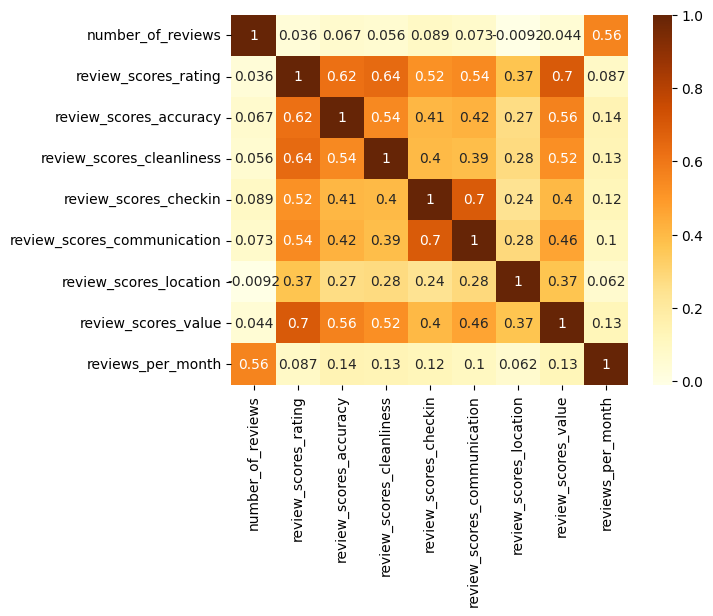

In [18]:
corr = df_rew.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values , cmap = 'YlOrBr' , annot=True)

array([[<AxesSubplot: title={'center': 'number_of_reviews'}>,
        <AxesSubplot: title={'center': 'reviews_per_month'}>]],
      dtype=object)

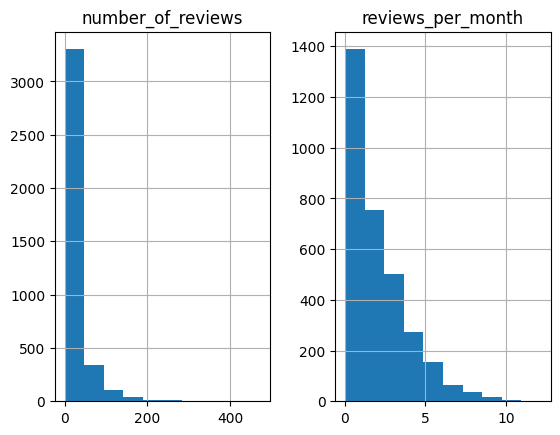

In [19]:
df_rew[['number_of_reviews', 'reviews_per_month']].hist()

C:\Users\eusep\AppData\Local\Temp\ipykernel_16640\2457749264.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_cl.hist(layout=(1,3), ax=ax)


array([[<AxesSubplot: title={'center': 'review_scores_rating'}>,
        <AxesSubplot: title={'center': 'reviews_per_month'}>,
        <AxesSubplot: title={'center': 'cx_score'}>]], dtype=object)

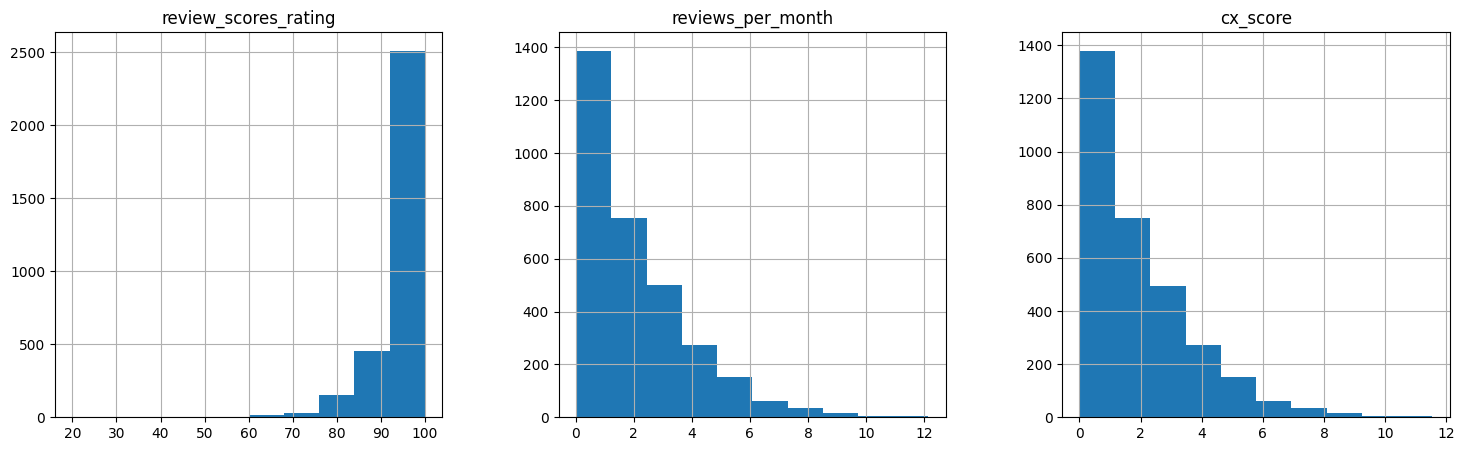

In [26]:
# key driver of a of client satisfaction can be two metrics
#['review_scores_rating'] 
#['reviews_per_month']
df_cl = df_rew[['review_scores_rating', 'reviews_per_month']].copy()
df_cl['cx_score'] = df_cl['review_scores_rating']/100* df_cl['reviews_per_month']

fig = plt.figure(figsize = (18,5))
ax = fig.gca()
df_cl.hist(layout=(1,3), ax=ax)

# the cx score is the overall measure to assess the customer review

In [31]:
cols = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'beds', 'bed_type', 'amenities', 'square_feet']
df[cols].isna().sum()

property_type       1
room_type           0
accommodates        0
bathrooms          16
beds                1
bed_type            0
amenities           0
square_feet      3721
dtype: int64

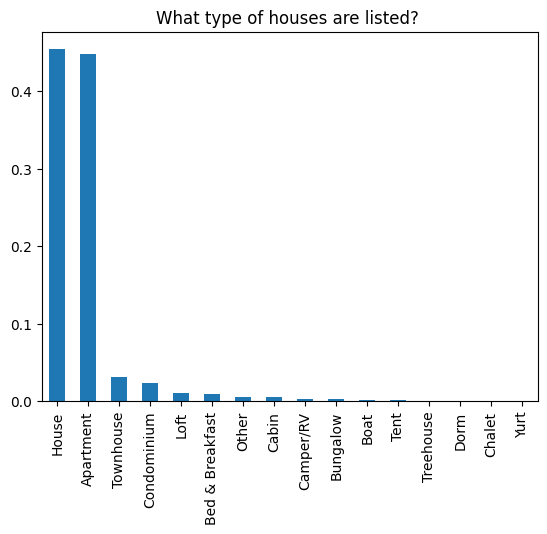

In [32]:
status_vals = df.property_type.value_counts()#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What type of houses are listed? ");

       accommodates    bathrooms         beds  square_feet
count   3818.000000  3802.000000  3817.000000    97.000000
mean       3.349398     1.259469     1.735394   854.618557
std        1.977599     0.590369     1.139480   671.404893
min        1.000000     0.000000     1.000000     0.000000
25%        2.000000     1.000000     1.000000   420.000000
50%        3.000000     1.000000     1.000000   750.000000
75%        4.000000     1.000000     2.000000  1200.000000
max       16.000000     8.000000    15.000000  3000.000000


C:\Users\eusep\AppData\Local\Temp\ipykernel_16640\374395729.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[cols].hist(layout=(1,4), ax=ax)


array([[<AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'square_feet'}>]], dtype=object)

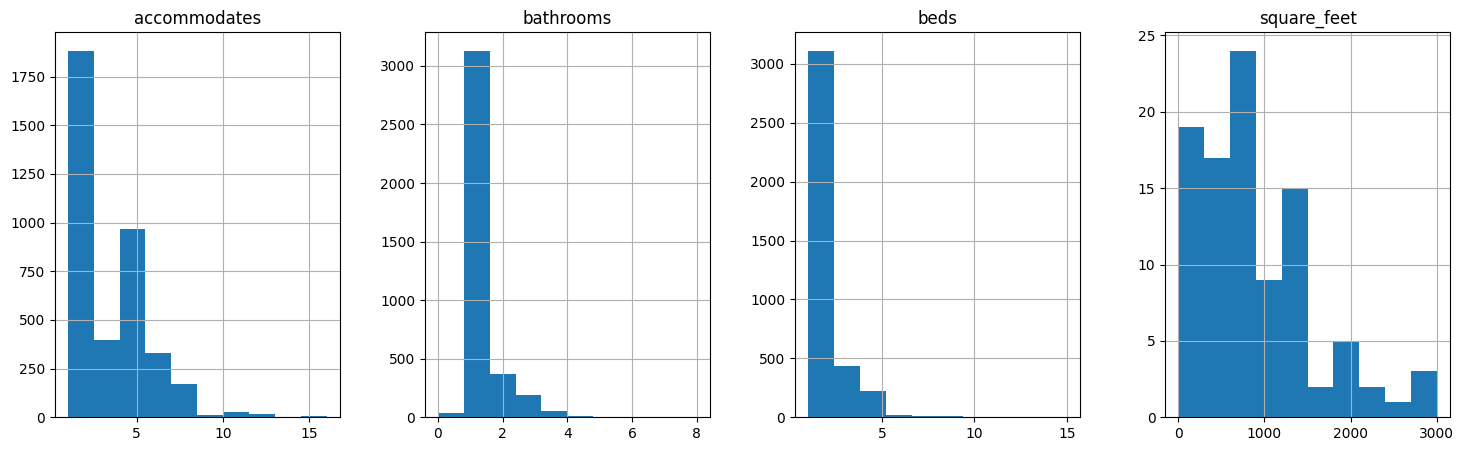

In [35]:
#looking into the key features of the listings
cols = ['accommodates', 'bathrooms', 'beds', 'square_feet']
print(df[cols].describe())
fig = plt.figure(figsize = (18,5))
ax = fig.gca()
df[cols].hist(layout=(1,4), ax=ax)

In [36]:
df['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                     11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentia

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64


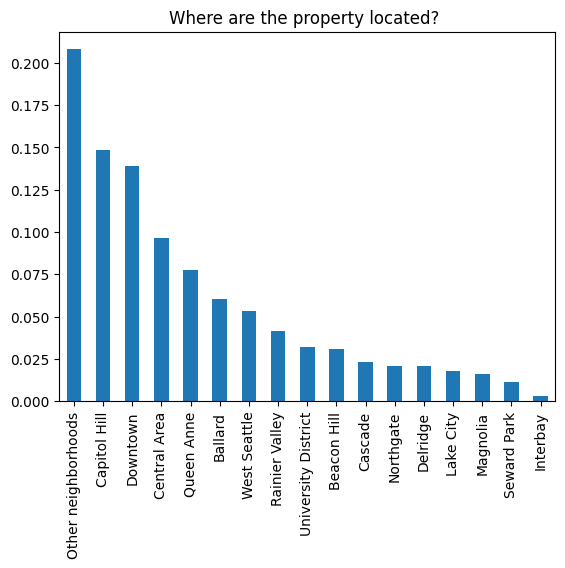

In [41]:
cols = ['street', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'jurisdiction_names']

# different level of specification
borough = ['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']

status_vals = df.neighbourhood_group_cleansed.value_counts()#Provide a pandas series of the counts for each Professional status
print(status_vals)
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Where are the property located? ");




In [52]:
# policies to be avaluated
cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'requires_license', 'license',
       'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification',
       'cancellation_policy']

# licence  = NA drop
#        
df[cols].head()
df[cols].isna().sum()/df.shape[0]

# create a new column with the price paid per guest
#df['Price_per_Guest']=df["price"].replace('[\$,]', '', regex=True).astype(float)/df["accommodates"]


# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.
#df['Price_per_Guest'].plot.hist(bins=25, alpha=0.5)



price                               0.000000
weekly_price                        0.473808
monthly_price                       0.602672
security_deposit                    0.511262
cleaning_fee                        0.269775
guests_included                     0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
requires_license                    0.000000
license                             1.000000
instant_bookable                    0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
cancellation_policy                 0.000000
dtype: float64

In [54]:
cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights']
df_dollar = df[cols].copy()

# Convert the money columns into floats
dollar_to_float = lambda x: x.replace('[\$,]', '', regex=True).astype(float)
money_cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
df_dollar[money_cols] = df[money_cols].apply(dollar_to_float, axis=1)

df_dollar.describe()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
count,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,10.667627,2.369303,780.447617
std,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,17.585922,16.305902,1683.589007
min,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000
25%,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000
50%,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000
75%,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000
max,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000


C:\Users\eusep\AppData\Local\Temp\ipykernel_16640\2910184430.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_dollar.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'weekly_price'}>,
        <AxesSubplot: title={'center': 'monthly_price'}>],
       [<AxesSubplot: title={'center': 'security_deposit'}>,
        <AxesSubplot: title={'center': 'cleaning_fee'}>,
        <AxesSubplot: title={'center': 'guests_included'}>],
       [<AxesSubplot: title={'center': 'extra_people'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>]], dtype=object)

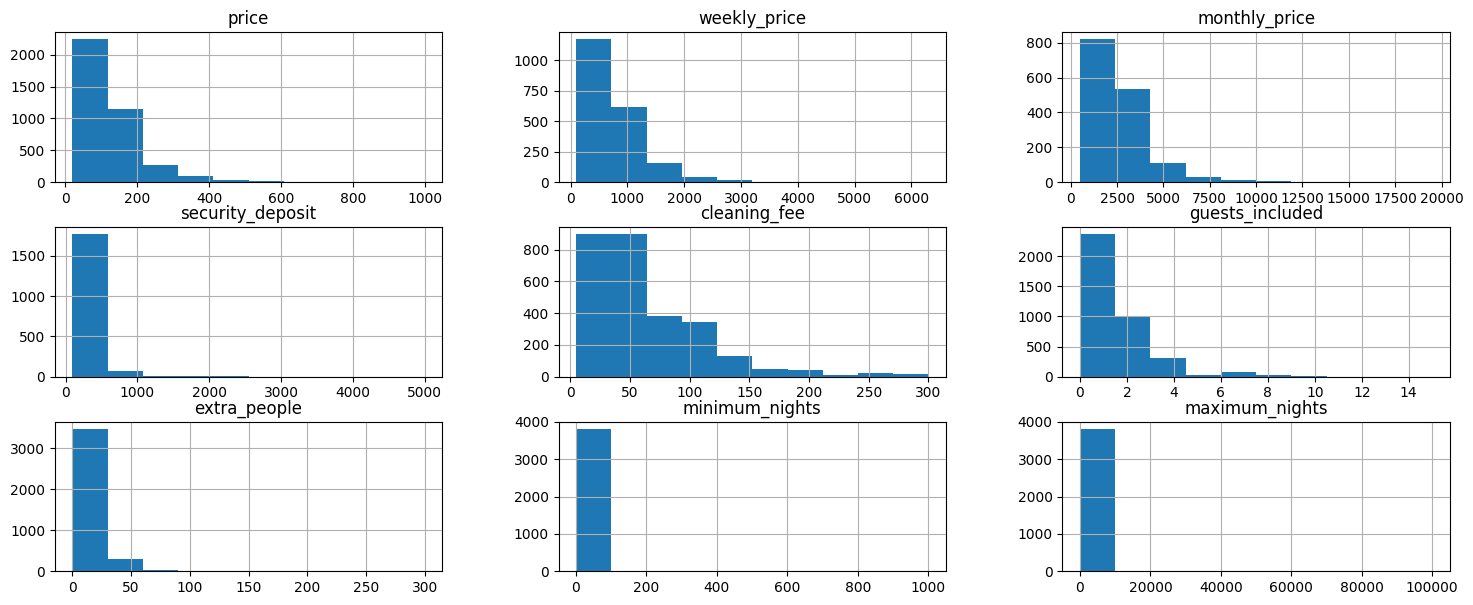

In [56]:
fig = plt.figure(figsize = (18,7))
ax = fig.gca()
df_dollar.hist(ax=ax)

In [93]:
# columns related to general attributes
cols = ['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit']
df[cols].head()



,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ..."
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...


In [95]:
df['description_positive_score'] = df['description'].apply(lambda x : sia.polarity_scores(x)['pos'])
df['description_negative_score'] = df['description'].apply(lambda x : sia.polarity_scores(x)['neg'])


0       0.029
1       0.082
2       0.000
3       0.000
4       0.015
        ...  
3813    0.000
3814    0.036
3815    0.074
3816    0.028
3817    0.000
Name: description_negative_score, Length: 3818, dtype: float64

In [100]:
df['description_negative_score'] 
df[cols].isnull().sum() / df.shape[0]

name                     0.000000
summary                  0.046359
space                    0.149031
description              0.000000
experiences_offered      0.000000
neighborhood_overview    0.270299
notes                    0.420639
transit                  0.244631
dtype: float64

In [101]:
# columns related to the attributes of the hosts

cols = ['host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'calculated_host_listings_count']
df[cols].head()

,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count
0,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,2
1,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,6
2,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,2
3,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,1
4,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,1


<AxesSubplot: >

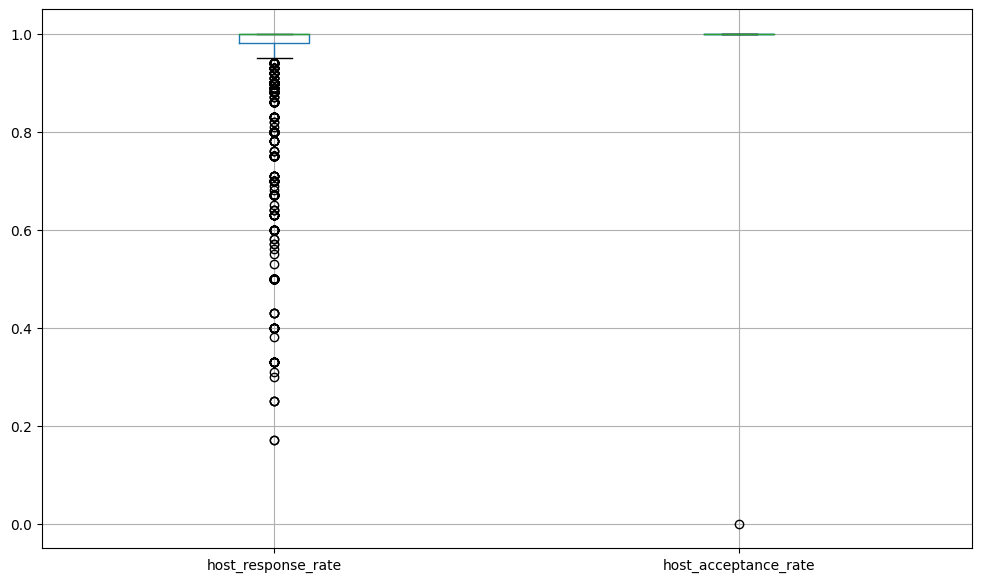

In [104]:
df_Host = df[['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count']].copy()
df_Host.corr()
#calculated_host_listings_count is probably th ebest 

cols = ['host_response_rate', 'host_acceptance_rate']
df_host2 = df[cols].copy()

# Convert the percentage columns into floats
pct_to_float = lambda x: x.str.replace(r'%', r'.0').astype('float') / 100.0

# Apply the function to the rate cols
df_host2 = df_host2.apply(pct_to_float, axis=1)

fig = plt.figure(figsize = (12,7))
ax = fig.gca()
df_host2.boxplot(ax=ax)

Data preparation and creation of a new set of variables


In [2]:
df_new = df.copy()

df_new['cx_score'] = df_new['review_scores_rating'] / 100 * df_new['reviews_per_month']

Selection of the top neighborhood location and relative spread for each subsection

Index(['Broadway', 'Belltown', 'Wallingford', 'Fremont', 'Minor',
       'University District', 'Stevens', 'First Hill',
       'Central Business District', 'Lower Queen Anne'],
      dtype='object')


C:\Users\eusep\AppData\Local\Temp\ipykernel_14488\1412112450.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['n'] = np.where(df_temp['neighbourhood_group_cleansed'] == 'University District',


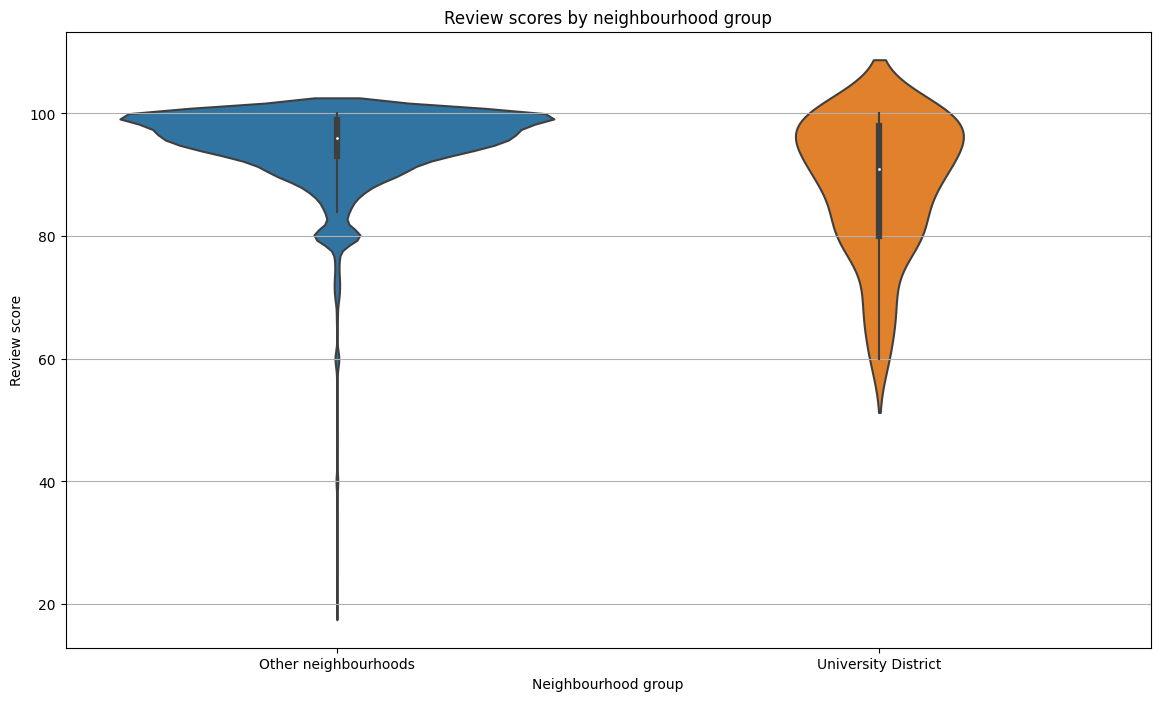

In [23]:
top_locs = df_new['neighbourhood_cleansed'].value_counts()[:10].index
print(top_locs)
fontsize = 10

df_temp = df[['neighbourhood_group_cleansed', 'review_scores_rating']]
df_temp['n'] = np.where(df_temp['neighbourhood_group_cleansed'] == 'University District', 
'University District', 'Other neighbourhoods')

df_temp.head()

fig, axes = plt.subplots(figsize=(14, 8))
sns.violinplot(x='n',y='review_scores_rating', data=df_temp, ax = axes)
axes.set_title('Review scores by neighbourhood group')

axes.yaxis.grid(True)
axes.set_xlabel('Neighbourhood group')
axes.set_ylabel('Review score')

plt.show()

Analisis of the other component of the cx score

C:\Users\eusep\AppData\Local\Temp\ipykernel_14488\3565870044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['n'] = np.where(


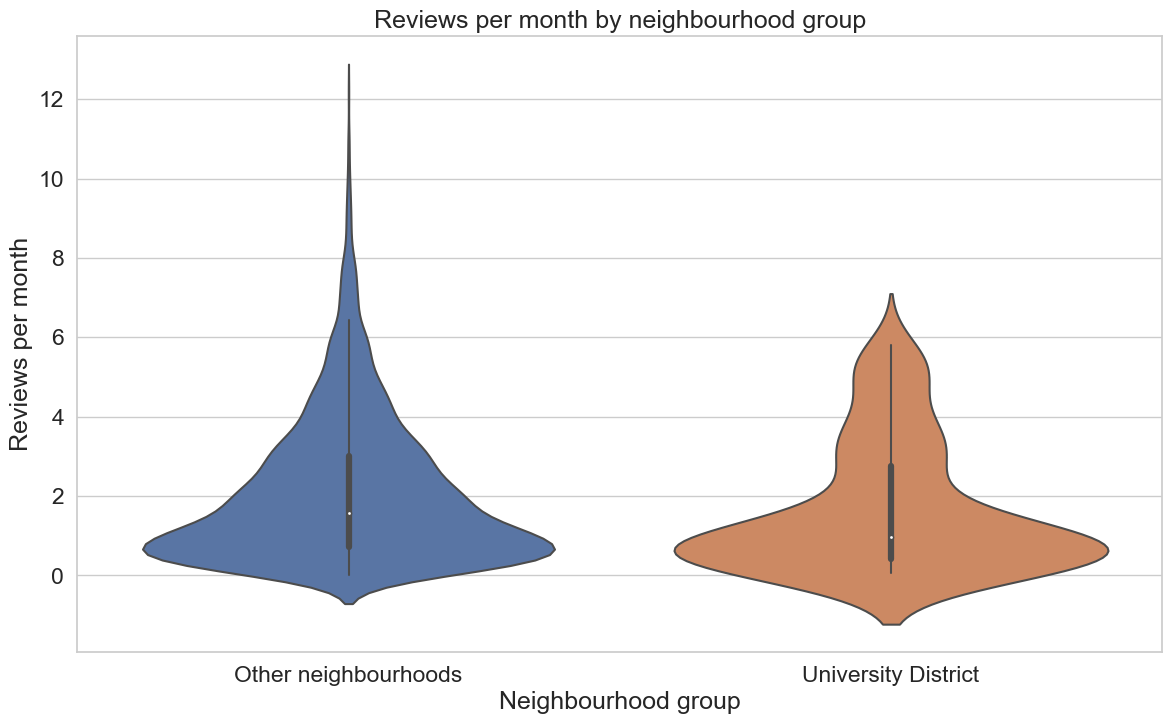

In [25]:
fontsize = 10
sns.set(style="whitegrid", font_scale=1.5)
df_temp = df_new[['neighbourhood_group_cleansed', 'reviews_per_month']]
df_temp['n'] = np.where(
    df_temp['neighbourhood_group_cleansed'] == 'University District', 
    'University District', 'Other neighbourhoods'
)

fig, axes = plt.subplots(figsize=(14, 8))
sns.violinplot(x='n',y='reviews_per_month', data=df_temp, ax = axes)
axes.set_title('Reviews per month by neighbourhood group')

axes.yaxis.grid(True)
axes.set_xlabel('Neighbourhood group')
axes.set_ylabel('Reviews per month')

plt.show()

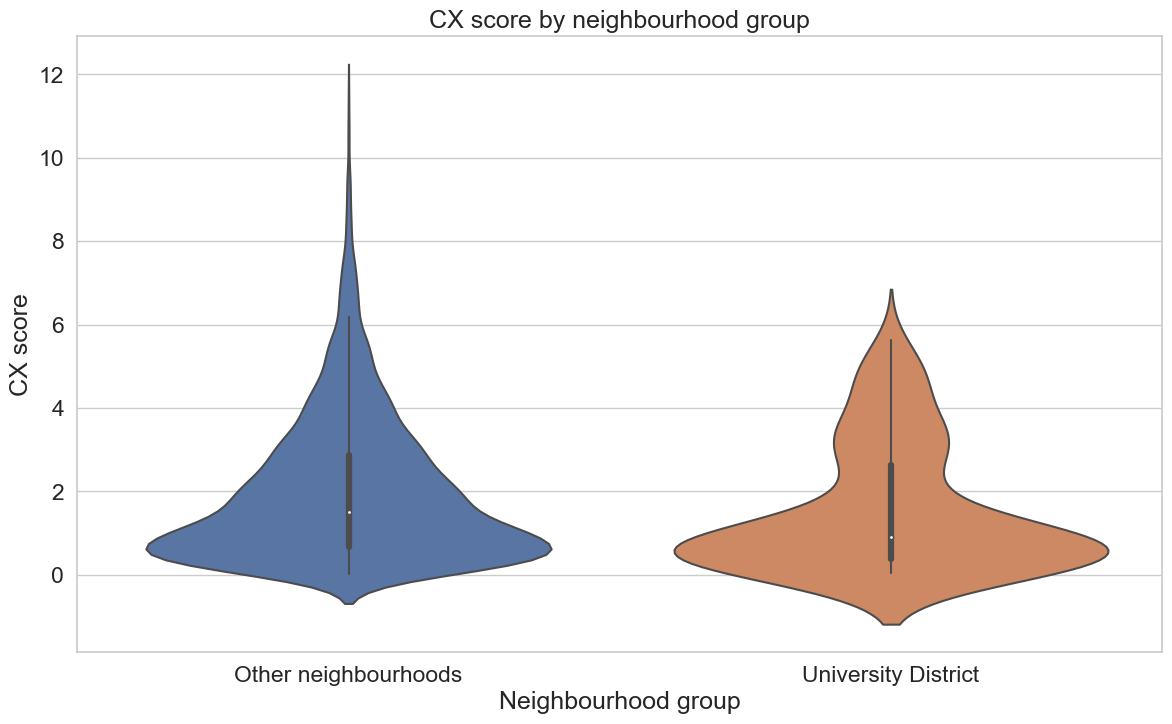

In [26]:
fontsize = 10

df_temp = df[['neighbourhood_group_cleansed', 'review_scores_rating', 'reviews_per_month']].copy()
df_temp['cx_score'] = df_temp['review_scores_rating'] / 100 * df_temp['reviews_per_month']
df_temp['n'] = np.where(
    df_temp['neighbourhood_group_cleansed'] == 'University District', 
    'University District', 'Other neighbourhoods'
)

fig, axes = plt.subplots(figsize=(14, 8))
sns.violinplot(x='n',y='cx_score', data=df_temp, ax = axes)
axes.set_title('CX score by neighbourhood group')

axes.yaxis.grid(True)
axes.set_xlabel('Neighbourhood group')
axes.set_ylabel('CX score')

plt.show()

Preparing the data set for the analysis - selection of variables in our data set

In [14]:

df_work = df.copy()

df_work['description_positive_score'] = df_work['description'].apply(lambda x : sia.polarity_scores(x)['pos'])
df_work['description_negative_score'] = df_work['description'].apply(lambda x : sia.polarity_scores(x)['neg'])
df_work['cx_score'] = df_work['review_scores_rating'] / 100 * df_work['reviews_per_month']

df_work = df_work.drop(['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
             'review_scores_location', 'review_scores_value', 'reviews_per_month'], axis=1)

df_work.head(10) 
print(df_work.shape)
df_work = df_work.dropna(subset=['cx_score'])
print(df_work.shape)
df_work = df_work.drop(['requires_license', 'license'], axis=1)
df_work = df_work.drop(['name', 'summary', 'space','zipcode', 'street','market', 'smart_location', 'country_code','jurisdiction_names',
                        'description', 'experiences_offered', 'neighborhood_overview','notes', 'transit'], axis=1)
df_work = df_work.drop(['host_name', 'host_acceptance_rate', 'host_total_listings_count'], axis=1)             
df_work = df_work.drop(['calendar_updated', 'has_availability', 'availability_30', 'availability_60',
             'availability_90', 'availability_365'], axis=1)             
df_work = df_work.set_index('id')


df_work = df_work.drop(['listing_url', 'scrape_id', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
              'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped'], axis=1)


print(df_work.shape)
df_work.columns 

(3818, 84)
(3171, 84)
(3171, 47)


Index(['last_scraped', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'description_positive_score', 'description_negative_score', 'cx_score'],
      dtype='object')

Let's create new trasformed variables

In [15]:
toomany_NA = df_work.columns[df_work.isnull().sum() / df_work.shape[0] >0.75][0]
df_work = df_work.drop([toomany_NA],axis=1)
print(df_work.shape)


(3171, 46)


Add the dummies columns

In [17]:
df_work, cols_neighbourhood_cleansed = dtprep.convert_neighbourhood_cleansed(df_work)
df_work, cols_neighbourhood_group_cleansed = dtprep.convert_neighbourhood_group_cleansed(df_work)
df_work, cols_property_type = dtprep.convert_property_type(df_work)
df_work, cols_cancellation_policy = dtprep.convert_cancellation_policy(df_work)
df_work, cols_room_type = dtprep.convert_room_type(df_work)

#keeping track ofthe colsdummy
cols_dummies = []
cols_dummies.extend(cols_neighbourhood_cleansed)
cols_dummies.extend(cols_neighbourhood_group_cleansed)
cols_dummies.extend(cols_property_type)
cols_dummies.extend(cols_cancellation_policy)
cols_dummies.extend(cols_room_type)

In [18]:
# map columns to new variables
df_work = dtprep.convert_host_since(df_work)
df_work = dtprep.convert_host_location(df_work)
df_work = dtprep.convert_host_about(df_work)
df_work = dtprep.convert_host_response_time(df_work)
df_work = dtprep.convert_host_response_rate(df_work)
#df_work = convert_host_neighbourhood(df_work)
df_work = dtprep.convert_host_verifications(df_work)
df_work = dtprep.convert_host_has_profile_pic(df_work)
df_work = dtprep.convert_host_identity_verified(df_work)
df_work = dtprep.convert_bed_type(df_work)
df_work = dtprep.convert_amenities(df_work)
df_work = dtprep.convert_price(df_work)
df_work = dtprep.convert_weekly_price(df_work)
df_work = dtprep.convert_monthly_price(df_work)
df_work = dtprep.convert_security_deposit(df_work)
df_work = dtprep.convert_cleaning_fee(df_work)
df_work = dtprep.convert_extra_people(df_work)
df_work = dtprep.convert_instant_bookable(df_work)
df_work = dtprep.convert_require_guest_profile_picture(df_work)
df_work = dtprep.convert_require_guest_phone_verification(df_work)
df_work = dtprep.convert_host_is_superhost(df_work)
df_work = dtprep.convert_is_location_exact(df_work)

c:\Users\eusep\OneDrive\Documenti\GitHub\Project\DataPrepFunctions.py:311: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities_dogs'] = df['amenities'].str.contains('Dog(s)')
c:\Users\eusep\OneDrive\Documenti\GitHub\Project\DataPrepFunctions.py:313: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities_cats'] = df['amenities'].str.contains('Cat(s)')
c:\Users\eusep\OneDrive\Documenti\GitHub\Project\DataPrepFunctions.py:323: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['amenities_other_pets'] = df['amenities'].str.contains('Other pet(s)')


In [19]:
df_work.shape

(3171, 218)

C:\Users\eusep\AppData\Local\Temp\ipykernel_24272\3454009799.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_work.corr()


<AxesSubplot: >

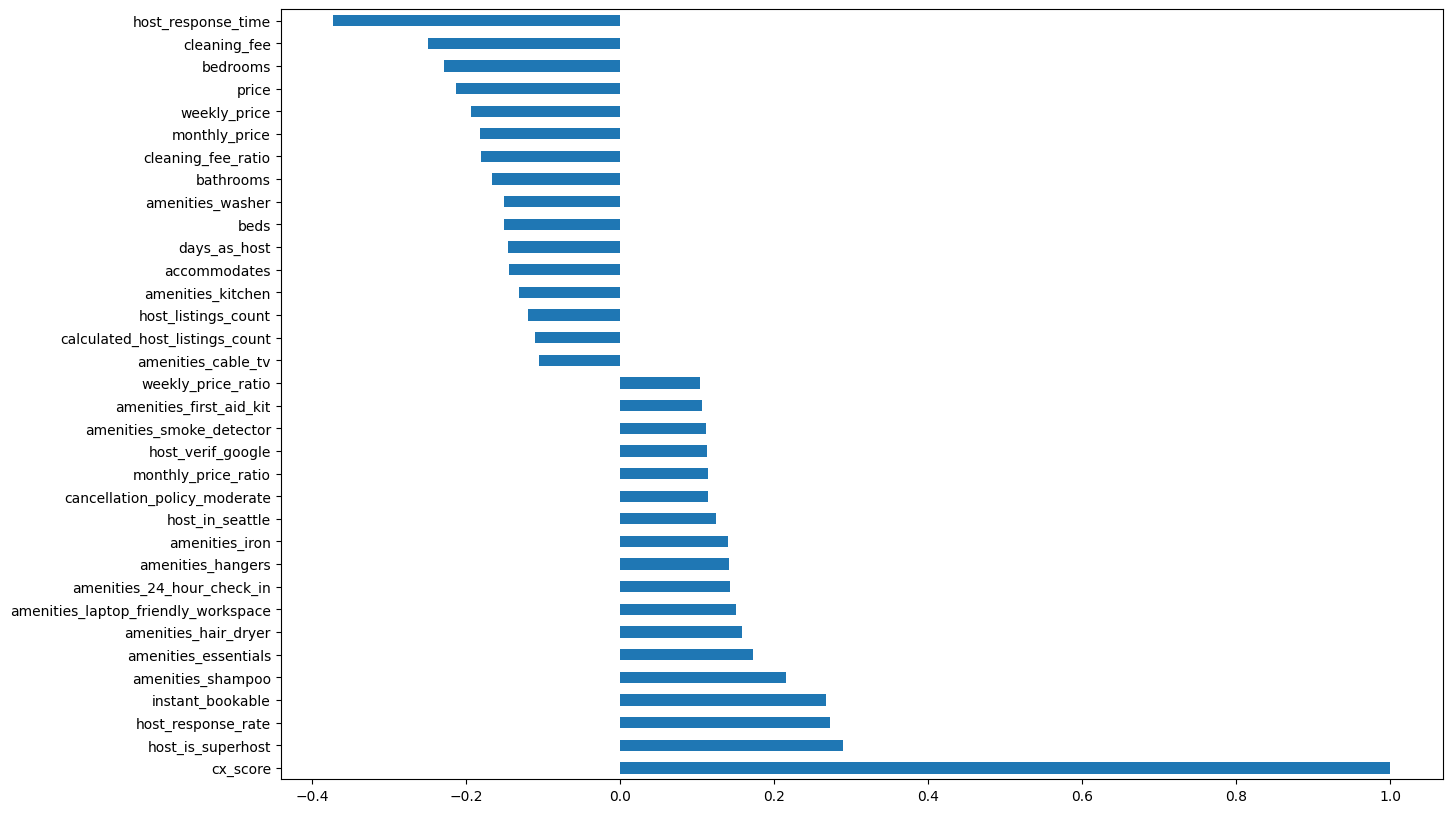

In [20]:
# Get a correlation matrix
corr = df_work.corr()

# Look at variables correlating with our response variable
corr_y = corr['cx_score']

# Plot a horizontal bar chart of the features with > 0.4 correlation (either positive or negative)
fontsize = 10
plt.figure(figsize=(15,10))
corr_y[np.abs(corr_y) > 0.1].sort_values(ascending=False).plot.barh()

In [24]:
df_work[corr_y[np.abs(corr_y) > 0.15].index.values].columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price',
       'monthly_price', 'cleaning_fee', 'instant_bookable', 'cx_score',
       'amenities_washer', 'amenities_essentials', 'amenities_shampoo',
       'amenities_laptop_friendly_workspace', 'amenities_hair_dryer',
       'cleaning_fee_ratio'],
      dtype='object')

In [49]:
df2 = df_work[corr_y[np.abs(corr_y) > 0.10].index.values]
df2.shape

(3171, 34)

In [50]:
df2.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,amenities_shampoo,amenities_first_aid_kit,amenities_24_hour_check_in,amenities_hangers,amenities_laptop_friendly_workspace,amenities_iron,amenities_hair_dryer,weekly_price_ratio,monthly_price_ratio,cleaning_fee_ratio
id,,,,,,,,,,,,,,,,,,,,,
241032,2.0,0.96,0.0,3.0,4,1.0,1.0,1.0,85.0,595.0,...,False,False,False,False,False,False,False,7.000000,30.416667,0.000000
953595,1.0,0.98,1.0,6.0,4,1.0,1.0,1.0,150.0,1000.0,...,False,True,False,False,False,False,False,6.666667,20.000000,0.266667
3308979,2.0,0.67,0.0,2.0,11,4.5,5.0,7.0,975.0,6825.0,...,True,False,False,False,False,False,False,7.000000,30.416667,0.307692
278830,1.0,1.00,0.0,2.0,6,2.0,3.0,3.0,450.0,3150.0,...,True,True,False,False,False,False,False,7.000000,30.416667,0.277778
5956968,4.0,0.00,0.0,1.0,2,1.0,1.0,1.0,120.0,800.0,...,True,False,False,False,False,False,False,6.666667,30.416667,0.333333


In [51]:
df2.dropna(inplace=True)  # data are overwritten

C:\Users\eusep\AppData\Local\Temp\ipykernel_24272\1995657139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)  # data are overwritten


In [52]:
df2.shape

(3153, 34)

In [53]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.3, random_state=0)
X_train = train.drop(['cx_score'], axis=1)
y_train = train['cx_score']

X_test = test.drop(['cx_score'], axis=1)
y_test = test['cx_score']

In [54]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
y_train_preds = ols.predict(X_train)
print(r2_score(y_train, y_train_preds))
np.sqrt(mean_squared_error(y_train, y_train_preds))

0.35581723965748135


1.3802990552210987

In [55]:
y_test_preds = ols.predict(X_test)
print(r2_score(y_test, y_test_preds))
np.sqrt(mean_squared_error(y_test, y_test_preds))

0.34995461854691534


1.4522692192082864

In [56]:
from sklearn.linear_model import RidgeCV

reg = RidgeCV(cv=8)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))

y_pred = reg.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_preds))


0.355529913696244


1.3802990552210987

In [57]:
print(reg.score(X_test, y_test))
y_test_preds = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_preds))

0.3500421030265457


1.452171491191492